# VPoser Decoder
The original body pose space of [SMPL](http://smpl.is.tue.mpg.de/) are not bounded to natural human pose space. That means you can put a vector value as the pose of a SMPL body model and get broken body, that might not even look like a human.
To address this you can replace the original pose space of SMPL with VPoser's latent space that corresponds to natural human pose space.
The original **body pose space** of SMPL holds 3 dimentions axis-angle representation of 21 joints which in total sums to a vector of 63 elements. The latent space of the VPoser has 32 elements that have a Normal distribution.
This means if you sample a 32 dimentional random vector from a Normal distribution and pass it as your pose you should get  a viable human joint configuration. This representation of pose is fully differentiable and can be used in an end-to-end deep learning pipeline.

In this tutorial we will sample a 32 dimentional vector from a Normal distribution and using the decoder of VPoser create a 63 dimentional vector that can pose the body of a SMPL model.
 
First you need to obtain a trained VPoser from https://smpl-x.is.tue.mpg.de/downloads and a variation of SMPL model, here we use SMPL+H, from https://mano.is.tue.mpg.de/downloads under *Extended SMPLH model for AMASS*.
Put the obtained vposer model and body models in a folder, here we assume respectively

'GITHUB_CLONE_ROOT/human_body_prior/dowloads/vposer_v1_0', and 
'GITHUB_CLONE_ROOT/human_body_prior/dowloads/models/smplh/female/model.npz'


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib inline

expr_dir = '../downloads/vposer_v1_0' #'TRAINED_MODEL_DIRECTORY'  in this directory the trained model along with the model code exist
bm_path =  '../downloads/models/smplh/female/model.npz'#'PATH_TO_SMPLX_model.npz'  obtain from https://smpl-x.is.tue.mpg.de/downloads

In [2]:
#Loading SMPLx Body Model
from human_body_prior.body_model.body_model import BodyModel

bm = BodyModel(bm_path=bm_path, batch_size=1).to('cuda')

In [3]:
#Loading VPoser Body Pose Prior
from human_body_prior.tools.model_loader import load_vposer
vp, ps = load_vposer(expr_dir)
vp = vp.to('cuda')

Found Trained Model: ../downloads/vposer_v1_0/snapshots/TR00_E096.pt


In [4]:
import torch
import numpy as np

from human_body_prior.tools.visualization_tools import render_smpl_params
from human_body_prior.tools.visualization_tools import imagearray2file
from notebook_tools import show_image

poZ_body_sample.shape torch.Size([1, 32])
pose_body.shape torch.Size([1, 63])


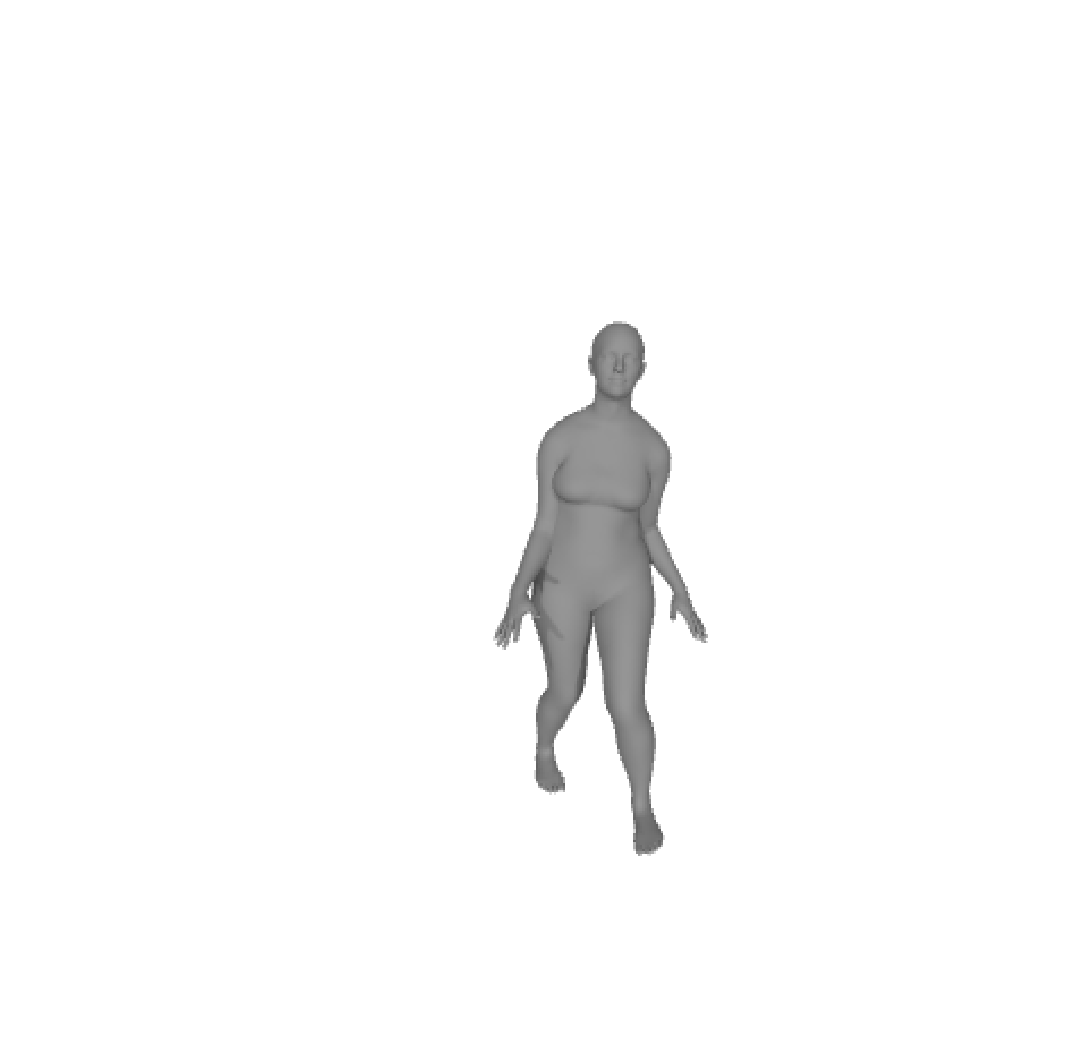

In [5]:
#Sample a 32 dimentional vector from a Normal distribution
poZ_body_sample = torch.from_numpy(np.random.randn(1,32).astype(np.float32)).to('cuda')
pose_body = vp.decode(poZ_body_sample, output_type='aa').view(-1, 63)

print('poZ_body_sample.shape', poZ_body_sample.shape)
print('pose_body.shape', pose_body.shape)

images = render_smpl_params(bm, pose_body).reshape(1,1,1,400,400,3)
img = imagearray2file(images)
show_image(np.array(img)[0])

Above we drawn a sample from a 32 dimentional Normal distribution and decoded its value to a full 63 dimentional SMPL body pose vector. The generated image shows the corresponding rendered body.